<h1 style="font-size:3rem;color:maroon;"> Predicting Air Pollution Level using Machine Learning</h1>

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting air pollution level in an area in Eindhoven in the upcoming week.

We're going to take the following approach:
1. Problem definition
2. Data
3. Features
4. Data Exploration & Visualization
5. Data Preparation
6. Modelling

<h2><font color=slateblue> 1. Problem Definition </font></h2>

In a statement,
> Given historical pollution data, weather data and people going through an area, can we predict air pollution level in an area in Eindhoven in the upcoming week?

<h2><font color=slateblue> 2. Data </font></h2>

The data is provided by TNO and Zicht op Data.

<h2><font color=slateblue> 3. Features </font></h2>

This is where you'll get different information about each of the features in our data.

We have three separate datasets for the period between 25-09-2021 and 30-12-2021:

**Air pollution**
* date: date in ymd_hms
* PC4: postcode
* pm2.5: particulate matter <2.5um in ug/m3
* pm10: particulate matter <10um in ug/m3
* no2: nitrogen dioxide in ug/m3
* no: nitrogen oxide in ug/m3
* so2: sulphur dioxide in ug/m3


**Meteo**
* date: date in ymd_hms
* PC4: postcode
* wd: wind direction in degrees 0-360
* ws: wind speed in m/s
* blh: boundary layer height in metres
* tcc: total cloud cover in oktas (0-9)
* ssrd: solar surface radiation downwards in W/m2 

(see https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels?tab=overview for more information)

**Zichtop**
* PC4: postcode
* date: date in ymd_hms
* pop_tot: total number of people in PC4 for each time step
* m00_30: number of people who have been there for up to 30 minutes
* m30_60: number of people who have been there for 30 and 60 minutes
* H1_2: number of people who have been there for 1 and 2 hours
* H2_4: number of people who have been there for 2 and 4 hours
* H4_8: number of people who have been there for 4 and 8 hours
* H8_16: number of people who have been there for 8 and 16 hours
* H16plus: number of people who have been there for over 16 hours

<h2><font color=slateblue> 4. Data Exploration & Visualization </font></h2>

In [1]:
import pandas as pd

df_meteo = pd.read_csv("data/meteo.csv")
df_air_pollution = pd.read_csv("data/air_pollution.csv")
df_meteo.sample(10)

,date,PC4,wd,ws,blh,tcc,ssrd
112274,2021-10-26 02:00:00,5626,220.025513,4.256942,478.559845,0.694868,0.000000
41056,2021-09-08 16:00:00,5615,338.603882,3.512604,1362.452759,0.000000,329.629549
185105,2021-02-17 17:00:00,5643,252.298264,4.793542,697.183228,0.799753,8.638787
54437,2021-03-20 05:00:00,5617,49.811768,1.510048,147.413788,0.357487,0.000000
191276,2021-11-01 20:00:00,5643,246.828827,3.865886,445.747559,0.161272,0.000000
183411,2021-12-09 03:00:00,5642,251.759323,4.144128,292.766968,0.016321,0.000000
151948,2021-05-07 04:00:00,5632,163.383804,2.407431,451.637634,0.995240,0.000000
121712,2021-11-23 08:00:00,5627,204.645950,2.074660,79.724823,0.938061,4.194421
190655,2021-10-06 23:00:00,5643,189.893921,2.144894,97.805298,0.226311,0.000000
131684,2021-01-12 20:00:00,5629,165.831635,3.090705,215.647766,0.025309,0.000000


In [2]:
df_air_pollution.sample(10)

,date,PC4,pm10,pm2.5,no2,no,so2
63388,2021-12-14 03:00:00,5612,11.121440,21.523020,8.017278,0.061689,1.873134
48218,2021-11-30 02:00:00,5655,2.527981,2.147574,10.748182,7.032055,3.389055
52628,2021-11-12 20:00:00,5658,14.048030,9.738823,13.951952,9.128139,3.629971
68281,2021-12-20 00:00:00,5621,29.404950,16.865620,8.804033,0.036764,0.200609
42746,2021-11-03 02:00:00,5652,20.773720,17.216866,42.806543,28.006408,2.649164
3282,2021-09-27 18:00:00,5613,15.634323,7.406947,25.965332,16.987957,2.530373
19018,2021-11-19 10:00:00,5625,38.748230,30.158672,41.642928,27.245107,2.139881
23762,2021-11-16 02:00:00,5628,31.820652,24.066103,29.074342,19.022043,3.995722
23682,2021-11-12 18:00:00,5628,32.410938,17.075712,24.749264,16.192338,3.558509
48000,2021-11-21 00:00:00,5655,16.107763,13.112632,18.004180,11.779331,4.103860


In [3]:
df_meteo['PC4'].unique()

array([5611, 5612, 5613, 5614, 5615, 5616, 5617, 5621, 5622, 5623, 5624,
       5625, 5626, 5627, 5628, 5629, 5631, 5632, 5633, 5641, 5642, 5643,
       5644, 5645, 5646, 5651, 5652, 5653, 5654, 5655, 5656, 5657, 5658])

In [4]:
df_meteo.shape

(289080, 7)

In [5]:
df_meteo['date'] = pd.to_datetime(df_meteo['date'])
df_air_pollution['date'] = pd.to_datetime(df_air_pollution['date'])
df_meteo.dtypes

date    datetime64[ns]
PC4              int64
wd             float64
ws             float64
blh            float64
tcc            float64
ssrd           float64
dtype: object

In [10]:
postalcode = df_meteo[df_meteo['PC4'] == 5611]
postalcode.sample(10)

,date,PC4,wd,ws,blh,tcc,ssrd
4190,2021-06-24 14:00:00,5611,125.652306,2.542364,893.641357,0.953105,247.088733
7690,2021-11-17 10:00:00,5611,209.922348,4.187299,395.782990,0.882623,98.768516
5816,2021-08-31 08:00:00,5611,90.804466,3.936872,542.873962,0.968776,183.361059
827,2021-02-04 11:00:00,5611,223.599091,2.884963,314.352264,0.999374,252.041979
4947,2021-07-26 03:00:00,5611,279.828674,2.020963,158.048752,0.652043,0.000000
3912,2021-06-13 00:00:00,5611,137.345520,1.967494,185.939819,0.062099,0.000000
4273,2021-06-28 01:00:00,5611,330.742188,2.582173,193.613358,0.942279,0.000000
2605,2021-04-19 13:00:00,5611,350.994629,2.112724,732.679077,0.625011,393.358472
2185,2021-04-02 01:00:00,5611,81.742058,2.782244,302.668518,0.312042,0.000000
2214,2021-04-03 06:00:00,5611,102.748108,2.831991,483.057770,0.443409,21.762765


<AxesSubplot:xlabel='ws', ylabel='ssrd'>

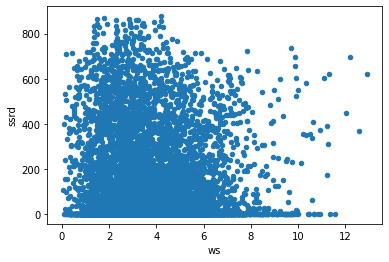

In [7]:
postalcode.plot.scatter(x = 'ws', y = 'ssrd')

<AxesSubplot:xlabel='date', ylabel='ws'>

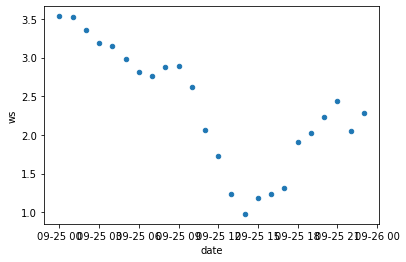

In [11]:
one_day = postalcode[postalcode['date']. dt. strftime('%Y-%m-%d')=='2021-09-25']

one_day.plot.scatter(x = 'date', y = 'ws')

In [9]:
df_meteo_air_pollution = pd.merge(df_meteo, df_air_pollution[['PC4','date', 'pm2.5']], on=['PC4', 'date'])
df_meteo_air_pollution.sample(5)

,date,PC4,wd,ws,blh,tcc,ssrd,pm2.5
52683,2021-11-25 03:00:00,5644,208.491928,1.289041,109.227219,1.000000,0.000000,26.224615
4435,2021-12-21 18:00:00,5612,354.826721,1.970872,94.044861,0.008775,0.000000,142.106300
46978,2021-10-12 10:00:00,5642,162.234985,2.884152,1004.287048,1.000000,69.808620,9.435607
30662,2021-10-11 14:00:00,5627,138.427216,3.786545,1037.043823,0.778993,231.801076,3.606278
4083,2021-12-07 02:00:00,5612,171.774216,4.948761,677.362732,0.956871,0.000000,16.058676


<h2><font color=slateblue> 5. Data Preparation </font></h2>

<h2><font color=slateblue> 6. Modelling </font></h2>